imports

In [26]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import re


cargar los datos

In [4]:
df = pd.read_csv('covtype.data', delimiter=',', header=None, names=data)

df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


separar datos

In [5]:

column_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points']

wilderness_area = [f'Wilderness_Area{i}' for i in range(1, 5)]
soil_type = [f'Soil_Type{i}' for i in range(1, 41)]

data = column_names + wilderness_area + soil_type + ['Cover_Type']

df



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:

df['Soil_Type'] = df[soil_type].sum(axis=1)
df['Wilderness_Area'] = df[wilderness_area].sum(axis=1)

df = df.drop(columns=soil_type)
df = df.drop(columns=wilderness_area)

df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


Ejercicio 1

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.

random_state=100

In [12]:



X = df.drop("Cover_Type", axis=1)  # Features
y = df["Cover_Type"]  # Target variable


model = ExtraTreesClassifier(random_state=100)
model.fit(X, y)


importances = model.feature_importances_


sorted_indices = np.argsort(importances)[::-1]


cumulative_importances = np.cumsum(importances[sorted_indices])


selected_indices = np.where(cumulative_importances <= 0.95)[0]


selected_features = X.columns[sorted_indices[selected_indices]]
filtered_df = df[selected_features].copy()


filtered_df["Cover_Type"] = y

filtered_df


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
0,2596,510,6279,258,0,51,232,221,5
1,2590,390,6225,212,-6,56,235,220,5
2,2804,3180,6121,268,65,139,238,234,2
3,2785,3090,6211,242,118,155,238,238,2
4,2595,391,6172,153,-1,45,234,220,5
...,...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,153,237,240,3
581008,2391,95,845,67,12,152,237,240,3
581009,2386,90,854,60,7,159,241,236,3
581010,2384,90,864,60,5,170,245,230,3


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
0,2596,510,6279,258,0,51,232,221,5
1,2590,390,6225,212,-6,56,235,220,5
2,2804,3180,6121,268,65,139,238,234,2
3,2785,3090,6211,242,118,155,238,238,2
4,2595,391,6172,153,-1,45,234,220,5
...,...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,153,237,240,3
581008,2391,95,845,67,12,152,237,240,3
581009,2386,90,854,60,7,159,241,236,3
581010,2384,90,864,60,5,170,245,230,3


Ejercicio 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

LLevar las variables de entrada a una escala de 0 a 1
Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

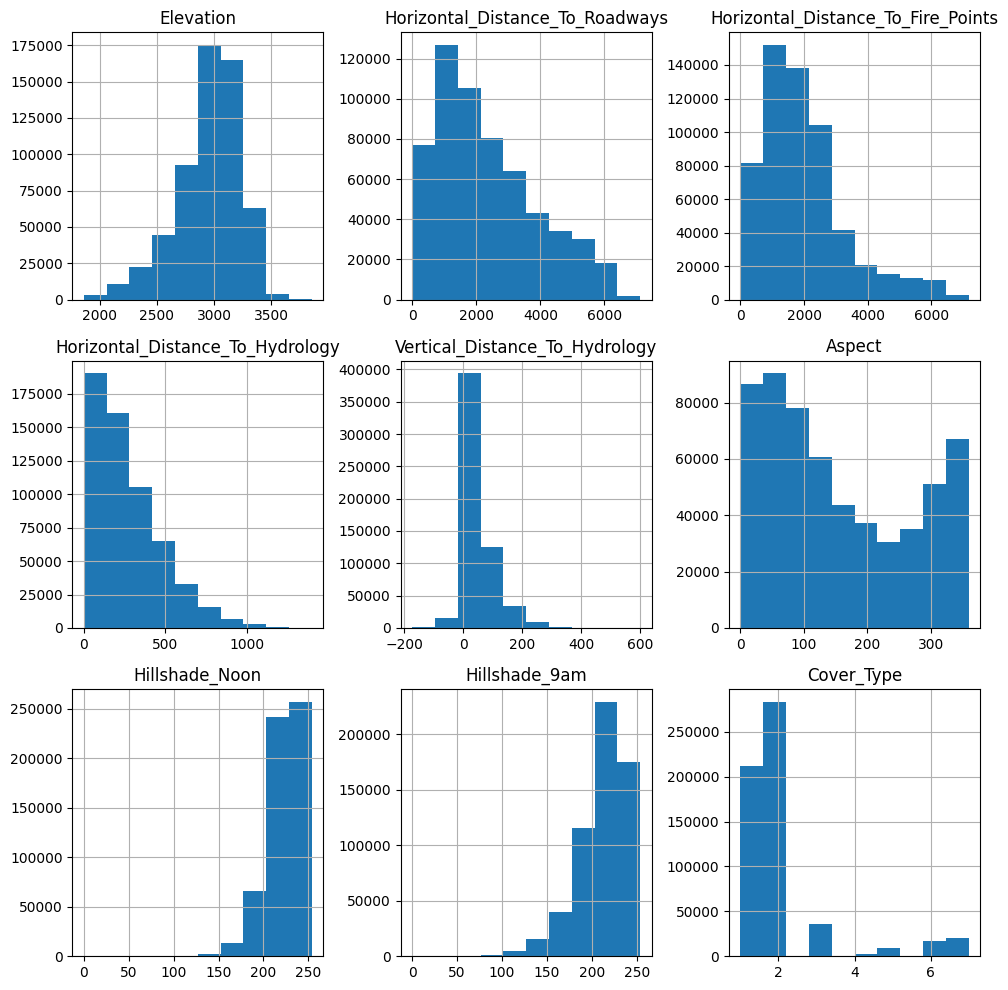

In [13]:
filtered_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [18]:
X = filtered_df.drop("Cover_Type", axis=1)  # Input features
y = filtered_df["Cover_Type"]  # Target variable

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

y_numeric = y - 1

normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
normalized_df["Cover_Type"] = y_numeric

y_numeric

0         4
1         4
2         1
3         1
4         4
         ..
581007    2
581008    2
581009    2
581010    2
581011    2
Name: Cover_Type, Length: 581012, dtype: int64

Ejercicio 3

Después de estandarizar los datos procedemos a crear el primer clasificador:

3.1 Divide el datset en training y en test:

Guarda el 20% de los datos para testeo.
random_state=100
3.2 Entrena un modelo de regresión logística:

Número máximo de iteraciones igual a 1000
random_state=100
3.3 Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
Confusion matrix

In [24]:
#3.1
X_train, X_test, y_train, y_test = train_test_split(normalized_df.drop("Cover_Type", axis=1), normalized_df["Cover_Type"], test_size=0.2, random_state=100)

#3.2
logreg = LogisticRegression(max_iter=1000, random_state=100)

logreg.fit(X_train, y_train)

#3.3
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

report = classification_report(y_test, y_pred, zero_division=0)

matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)


Accuracy: 0.6898272850098535
F1-score: 0.6711382775466836
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69     42446
           1       0.72      0.78      0.75     56592
           2       0.59      0.70      0.64      7133
           3       0.53      0.07      0.12       571
           4       0.00      0.00      0.00      1847
           5       0.31      0.07      0.11      3456
           6       0.57      0.21      0.31      4158

    accuracy                           0.69    116203
   macro avg       0.49      0.36      0.37    116203
weighted avg       0.67      0.69      0.67    116203

Confusion Matrix:
 [[29643 12151     4     0     0     0   648]
 [11245 44395   868     0     0    71    13]
 [    0  1694  4972    34     0   433     0]
 [    0     4   522    39     0     6     0]
 [    3  1841     3     0     0     0     0]
 [    0  1101  2122     0     0   233     0]
 [ 3208    72     0     0     0 

In [27]:

# Crear el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=100)

# Entrenar el modelo
dt_classifier.fit(X_train, y_train)

# Predecir las etiquetas de entrenamiento y prueba
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')
classification_rep = classification_report(y_test, y_test_pred, zero_division=0)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("F1-score (average='weighted'):", f1)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.916602841578961
F1-score (average='weighted'): 0.9166254179877442
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     42446
           1       0.93      0.93      0.93     56592
           2       0.89      0.90      0.90      7133
           3       0.79      0.84      0.81       571
           4       0.76      0.78      0.77      1847
           5       0.84      0.82      0.83      3456
           6       0.92      0.92      0.92      4158

    accuracy                           0.92    116203
   macro avg       0.86      0.87      0.87    116203
weighted avg       0.92      0.92      0.92    116203



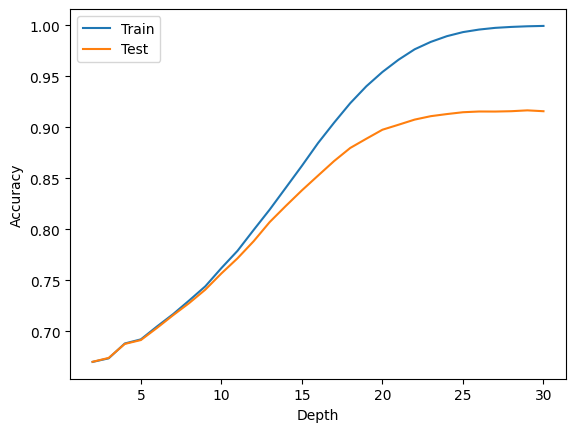

In [28]:

depths = np.arange(2, 31)

train_scores = []
test_scores = []

for depth in depths:
    dt_classifier = DecisionTreeClassifier(random_state=100, max_depth=depth)
    dt_classifier.fit(X_train, y_train)

    train_score = dt_classifier.score(X_train, y_train)
    test_score = dt_classifier.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

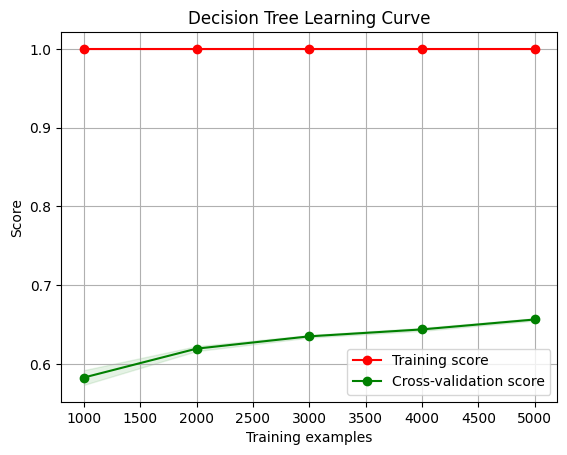

In [35]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Definir los tamaños de entrenamiento
train_sizes = [1000, 2000, 3000, 4000, 5000]

# Crear el clasificador Decision Tree con profundidad óptima
dt_classifier = DecisionTreeClassifier(random_state=100, max_depth=depth)

# Trazar la curva de aprendizaje
plot_learning_curve(dt_classifier, "Decision Tree Learning Curve", X_train, y_train, train_sizes, cv=5)

plt.show()

